# Projeto Final – TripleTen
**Mariana Guimarães Fonseca**   





# Projeto: Análise de Eficiência de Operadores – CallMeMaybe

## Contexto da Empresa <a id="contexto-e-objetivo"></a>
A CallMeMaybe é uma **plataforma de telefonia virtual** que fornece tecnologia para call centers de diferentes empresas gerenciarem suas chamadas.
Ela permite monitorar ligações, gerar relatórios e analisar a performance de operadores, **sem atender diretamente os clientes finais**.

## Objetivo do Projeto
O objetivo deste projeto é **identificar operadores menos eficientes** com base em dados de chamadas (entrantes, saídas e internas).  
Operadores ineficientes podem:
- Ter muitas chamadas perdidas;
- Apresentar longos tempos de espera;
- Fazer poucas chamadas ativas (no caso de operadores de saída).

## O que será desenvolvido
Para atingir este objetivo, o projeto irá:
1. Realizar **limpeza e pré-processamento** dos dados de chamadas e clientes;
2. Criar **métricas derivadas** para medir a eficiência de cada operador;
3. Realizar **análise exploratória de dados (EDA)** para entender padrões e identificar operadores com baixo desempenho;
4. Testar **hipóteses estatísticas** para validar as métricas de ineficiência;
5. Produzir **dashboard e relatório final** com insights e recomendações para supervisores.

# Índice do Projeto – Eficiência de Operadores CallMeMaybe

1. [Contexto e Objetivo](#contexto-e-objetivo)
2. [Importação de Bibliotecas](#importacao-bibliotecas)
3. [Carregamento do Dataset de Chamadas](#carregamento-telecom-data)
4. [Carregamento do Dataset de Clientes](#carregamento-telecom-clients)
5. [Limpeza e Pré-processamento do Dataset de Chamadas](#limpeza-telecom-data)
6. [Limpeza e Pré-processamento do Dataset de Clientes](#limpeza-telecom-clients)
7. [Métricas de Eficiência](#metricas-de-eficiencia)
8. [Análise Exploratória de Dados (EDA)](#analise-exploratoria)
9. [Testes Estatísticos](#testes-estatisticos)
10. [Identificação de Operadores Ineficientes](#operadores-ineficientes)
11. [Dashboard e Visualizações](#dashboard-e-visualizacoes)
12. [Conclusões e Recomendações](#conclusoes-e-recomendacoes)



In [86]:
from google.colab import drive
import os
import pandas as pd

# Monta o Google Drive
drive.mount('/content/drive')

# Define os caminhos dos arquivos
telecom_clients_path = '/content/drive/MyDrive/Sprint 14/telecom_clients (1).csv'
telecom_dataset_path = '/content/drive/MyDrive/Sprint 14/telecom_dataset_new (1).csv'

# Confirma se os arquivos existem
for nome, caminho in [('telecom_clients', telecom_clients_path), ('telecom_dataset', telecom_dataset_path)]:
    if os.path.exists(caminho):
        print(f"Arquivo {nome} encontrado!")
    else:
        print(f"Arquivo {nome} NÃO encontrado! Verifique o caminho.")

# Ler os arquivos com pandas
telecom_clients = pd.read_csv(telecom_clients_path)
telecom_dataset = pd.read_csv(telecom_dataset_path)

# Visualizar as primeiras linhas
print("telecom_clients:")
print(telecom_clients.head())

print("\ntelecom_dataset:")
print(telecom_dataset.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo telecom_clients encontrado!
Arquivo telecom_dataset encontrado!
telecom_clients:
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

telecom_dataset:
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0 

## Importação de Bibliotecas <a id="importacao-bibliotecas"></a>
Nesta célula serão importadas todas as bibliotecas necessárias para análise e visualização dos dados.


In [87]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
%matplotlib inline


## Carregamento do Dataset de Chamadas (telecom_dataset_us.csv) <a id="carregamento-telecom-data"></a>
Neste passo, vamos carregar o dataset principal com os registros diários de chamadas por operador.



In [88]:
telecom_dataset = pd.read_csv('/content/drive/MyDrive/Sprint 14/telecom_dataset_new (1).csv')

print(telecom_dataset.head(5))
telecom_dataset.info()

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Coun

## Carregamento do Dataset de Clientes (telecom_clients_us.csv) <a id="carregamento-telecom-clients"></a>
Neste passo, vamos carregar os dados dos clientes que utilizam o serviço da CallMeMaybe.


In [89]:
telecom_clients = pd.read_csv('/content/drive/MyDrive/Sprint 14/telecom_clients (1).csv')
print(telecom_clients.head(5))
telecom_clients.info()

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


## Limpeza e Pré-processamento do Dataset de Chamadas <a id="limpeza-telecom-data"></a>

Nesta célula vamos:
1. Corrigir tipos de dados (`date`, `internal`, `operator_id`);  
2. Tratar valores nulos (`internal` e `operator_id`);

In [90]:
# --- Passo 1: Corrigir tipos de dados ---
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'], errors='coerce')
telecom_dataset['internal'] = telecom_dataset['internal'].fillna(False).astype(bool)

# Alterar operator_id para string e preencher nulos com "unknown"
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype('Int64')  # mantém nulos
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype(str)
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].replace('<NA>', 'unknown')

# --- Passo 2: Checar e remover duplicados ---
telecom_dataset.drop_duplicates(inplace=True)
print(telecom_dataset.head())

#

   user_id                      date direction  internal operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in     False     unknown   
1   166377 2019-08-05 00:00:00+03:00       out      True      880022   
2   166377 2019-08-05 00:00:00+03:00       out      True      880020   
3   166377 2019-08-05 00:00:00+03:00       out      True      880020   
4   166377 2019-08-05 00:00:00+03:00       out     False      880022   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  


/tmp/ipython-input-1409123147.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_dataset['internal'] = telecom_dataset['internal'].fillna(False).astype(bool)


## Limpeza e Pré-processamento do Dataset de Clientes <a id="limpeza-telecom-clients"></a>

Nesta célula vamos:
1. Corrigir tipos de dados (`date_start`);  
2. Verificar duplicados;  
3. Conferir consistência dos planos tarifários.


In [91]:
# --- Passo 1: Converter tipos ---
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'], errors='coerce')

# --- Passo 2: Checar duplicados ---
print("Duplicados antes:", telecom_clients.duplicated().sum())
telecom_clients.drop_duplicates(inplace=True)
print("Duplicados após:", telecom_clients.duplicated().sum())

# --- Passo 3: Conferir planos tarifários ---
print("Planos tarifários únicos:")
display(telecom_clients['tariff_plan'].value_counts())

# --- Passo 4: Resumo inicial ---
print("Resumo Estatístico das colunas numéricas:")
display(telecom_clients.describe())

print("\nPrimeiras linhas do dataset de clientes:")
display(telecom_clients.head())


Duplicados antes: 0
Duplicados após: 0
Planos tarifários únicos:


,count
tariff_plan,
C,395
B,261
A,76


Resumo Estatístico das colunas numéricas:


,user_id,date_start
count,732.000000,732
mean,167431.927596,2019-09-14 16:39:20.655737600
min,166373.000000,2019-08-01 00:00:00
25%,166900.750000,2019-08-23 00:00:00
50%,167432.000000,2019-09-16 00:00:00
75%,167973.000000,2019-10-08 00:00:00
max,168606.000000,2019-10-31 00:00:00
std,633.810383,NaN



Primeiras linhas do dataset de clientes:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


*Não há linhas duplicadas. Nenhum registro foi removido.

*A maioria dos clientes está no plano C (54%), depois B (36%), e poucos no A (10%).

*date_start cobre o período agosto a outubro de 2019, então você pode comparar chamadas dentro desse intervalo.

*Distribuição dos contratos está razoavelmente espalhada ao longo do período.


## Métricas de Eficiência <a id="metricas-de-eficiencia"></a>

Nesta etapa, estamos transformando os dados brutos de chamadas em **informações que mostram a performance de cada operador**.  

As métricas criadas são:

1. **Missed Call Rate (Taxa de chamadas perdidas)**  
   - Calcula a proporção de chamadas que **não foram atendidas** pelo operador em relação ao total de chamadas que ele recebeu ou fez naquele dia.  
   - Valores mais altos indicam que o operador está perdendo muitas chamadas, o que pode indicar baixa eficiência.

2. **Tempo de Espera Médio (em segundos)**  
   - Mede quanto tempo, em média, uma chamada **ficou esperando** antes de ser atendida.  
   - Quanto maior o tempo, pior a experiência do cliente e menor a eficiência do operador.

3. **Chamadas Ativas (somente chamadas de saída)**  
   - Conta quantas chamadas o operador **realizou ativamente**.  
   - Importante para operadores que fazem chamadas de saída: números muito baixos podem indicar baixa produtividade.

Essas métricas são calculadas **para cada registro diário de cada operador**, mas depois serão **agregadas por operador** para ter uma visão geral da eficiência de cada pessoa.


In [92]:
# Missed Call Rate por linha
telecom_dataset['missed_call_rate'] = telecom_dataset['is_missed_call'].astype(int) / telecom_dataset['calls_count']

# Tempo de Espera Médio (em segundos)
telecom_dataset['avg_wait_time'] = (telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']) / telecom_dataset['calls_count']

# Chamadas Ativas (somente 'out')
telecom_dataset['active_calls'] = telecom_dataset.apply(lambda row: row['calls_count'] if row['direction'] == 'out' else 0, axis=1)

# Mostrar as primeiras linhas com as métricas criadas
display(telecom_dataset[['operator_id', 'date', 'missed_call_rate', 'avg_wait_time', 'active_calls']].head(10))

# Estatísticas descritivas das métricas
display(telecom_dataset[['missed_call_rate', 'avg_wait_time', 'active_calls']].describe())

# Valores máximos para identificar possíveis outliers
print("Operadores com maior taxa de chamadas perdidas:")
display(telecom_dataset[['operator_id', 'missed_call_rate']].sort_values(by='missed_call_rate', ascending=False).head(10))

print("Operadores com maior tempo de espera médio:")
display(telecom_dataset[['operator_id', 'avg_wait_time']].sort_values(by='avg_wait_time', ascending=False).head(10))

print("Operadores com mais chamadas ativas (saída):")
display(telecom_dataset[['operator_id', 'active_calls']].sort_values(by='active_calls', ascending=False).head(10))



,operator_id,date,missed_call_rate,avg_wait_time,active_calls
0,unknown,2019-08-04 00:00:00+03:00,0.500000,2.000000,0
1,880022,2019-08-05 00:00:00+03:00,0.333333,1.666667,3
2,880020,2019-08-05 00:00:00+03:00,1.000000,1.000000,1
3,880020,2019-08-05 00:00:00+03:00,0.000000,8.000000,1
4,880022,2019-08-05 00:00:00+03:00,0.333333,8.333333,3
5,880020,2019-08-05 00:00:00+03:00,0.000000,13.000000,2
6,880020,2019-08-05 00:00:00+03:00,0.125000,6.250000,8
7,unknown,2019-08-05 00:00:00+03:00,0.166667,5.833333,0
9,unknown,2019-08-06 00:00:00+03:00,0.250000,15.500000,0
10,881278,2019-08-06 00:00:00+03:00,0.333333,9.666667,3


,missed_call_rate,avg_wait_time,active_calls
count,49002.000000,49002.000000,49002.000000
mean,0.195369,16.828400,12.425289
std,0.340333,13.878241,55.152033
min,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000
50%,0.000000,14.500000,1.000000
75%,0.250000,22.250000,8.000000
max,1.000000,465.000000,4817.000000


Operadores com maior taxa de chamadas perdidas:


,operator_id,missed_call_rate
14,880028,1.0
12263,889754,1.0
12264,unknown,1.0
12304,889754,1.0
12311,unknown,1.0
12316,unknown,1.0
12317,889754,1.0
12320,889754,1.0
12322,unknown,1.0
12327,unknown,1.0


Operadores com maior tempo de espera médio:


,operator_id,avg_wait_time
3044,unknown,465.000000
52271,945278,451.203883
19683,unknown,366.000000
4220,unknown,354.000000
5758,unknown,332.000000
12629,unknown,294.000000
19828,unknown,274.500000
3416,907174,261.000000
22291,unknown,225.000000
1545,939478,215.000000


Operadores com mais chamadas ativas (saída):


,operator_id,active_calls
40733,929428,4817
40671,929428,2614
40690,929428,1533
40680,929428,1529
6984,885876,1480
6923,885876,1436
6874,885876,1375
40708,929428,1365
7213,885890,1248
6991,885876,1241


De forma geral, os dados mostram que:

-Em alguns registros, operadores atendem todas as chamadas, enquanto em outros perdem uma parte significativa ou até todas as chamadas.
- A **taxa média de chamadas perdidas** é relativamente alta, indicando que uma parcela relevante das chamadas não está sendo atendida, o que pode impactar negativamente a experiência dos clientes.
- O **tempo médio de espera** apresenta valores extremos em alguns casos, sugerindo que certos operadores (ou registros sem operador identificado) fazem clientes aguardarem muito mais do que o esperado.
- A métrica de **chamadas ativas** mostra que alguns operadores realizam muitas chamadas de saída, enquanto outros praticamente não realizam nenhuma, indicando diferenças claras de produtividade.
- Registros com **operador não identificado (`unknown`)** aparecem com frequência entre os piores valores, o que indica que esses dados podem distorcer a análise de eficiência individual.

Essas observações iniciais mostram que **não é adequado avaliar a eficiência com base em registros diários isolados**.  
Por isso, no próximo passo, as métricas serão **agregadas por operador**, permitindo uma avaliação mais justa e precisa do desempenho geral de cada operador.

## Análise Exploratória de Dados (EDA) <a id="analise-exploratoria"></a>

Nesta etapa, exploramos as métricas de eficiência criadas anteriormente
com o objetivo de entender sua distribuição, identificar padrões, outliers
e comportamentos atípicos.

A análise exploratória é fundamental para garantir que as decisões tomadas
na identificação de operadores ineficientes sejam baseadas em dados
consistentes e bem compreendidos.


In [93]:
# Dataset para EDA: removendo registros sem operador identificado
telecom_eda = telecom_dataset[telecom_dataset['operator_id'] != 'unknown'].copy()

print(f"Registros antes do filtro: {len(telecom_dataset)}")
print(f"Registros após remover 'unknown': {len(telecom_eda)}")


Registros antes do filtro: 49002
Registros após remover 'unknown': 41546


/tmp/ipython-input-1857636896.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


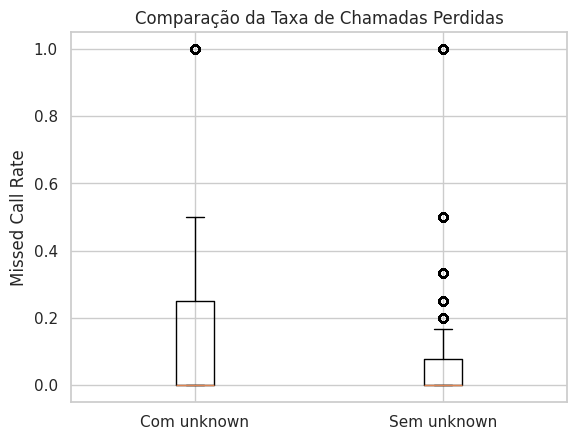

In [94]:
#Comparação de chamadas perdidas antes vs depois de remover unknow

plt.figure()
plt.boxplot(
    [
        telecom_dataset['missed_call_rate'],
        telecom_eda['missed_call_rate']
    ],
    labels=['Com unknown', 'Sem unknown']
)
plt.title('Comparação da Taxa de Chamadas Perdidas')
plt.ylabel('Missed Call Rate')
plt.show()


/tmp/ipython-input-817554545.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


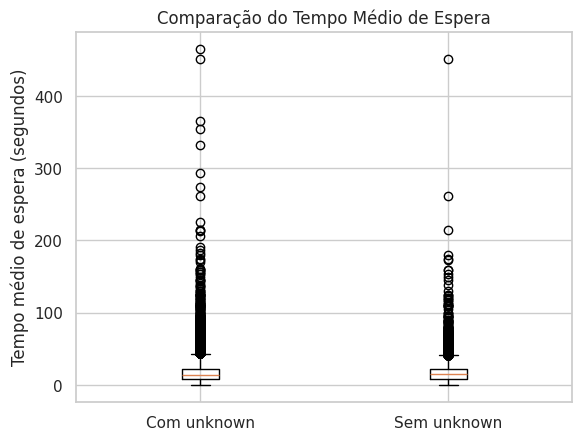

In [95]:
#Comparação de tempo médio de espera antes vs depois de remover unknow
plt.figure()
plt.boxplot(
    [
        telecom_dataset['avg_wait_time'],
        telecom_eda['avg_wait_time']
    ],
    labels=['Com unknown', 'Sem unknown']
)
plt.title('Comparação do Tempo Médio de Espera')
plt.ylabel('Tempo médio de espera (segundos)')
plt.show()


Para garantir uma análise mais precisa da eficiência individual, os registros
sem operador identificado (`unknown`) foram removidos nesta etapa. Esses dados
não representam operadores reais e poderiam distorcer a interpretação dos
resultados.

In [96]:
# Agregar dados por operador
# Aqui somamos volumes e tempos para evitar distorções de médias diárias

operator_metrics = telecom_eda.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    total_missed=('is_missed_call', 'sum'),
    total_wait_time=('total_call_duration', 'sum'),
    total_talk_time=('call_duration', 'sum'),
    total_active_calls=('active_calls', 'sum')
).reset_index()


#  Criar métricas finais por operador
#  Taxa de chamadas perdidas
operator_metrics['missed_call_rate'] = (
    operator_metrics['total_missed'] / operator_metrics['total_calls']
)

# Tempo médio de espera
operator_metrics['avg_wait_time'] = (
    (operator_metrics['total_wait_time'] - operator_metrics['total_talk_time'])
    / operator_metrics['total_calls']
)


#  Aplicar filtro mínimo de volume para comparação justa
# Operadores com poucas chamadas podem ter taxas instáveis

min_calls = 50
operator_metrics_f = operator_metrics[operator_metrics['total_calls'] >= min_calls].copy()

print(f"\nOperadores totais (sem unknown): {operator_metrics['operator_id'].nunique()}")
print(f"Operadores considerados (>= {min_calls} chamadas): {operator_metrics_f['operator_id'].nunique()}")


# Passo 4: Resumo estatístico das métricas (agregado por operador)

display(operator_metrics_f[['total_calls','total_missed','total_active_calls','missed_call_rate','avg_wait_time']].describe())


#  Definir limites objetivos usando percentis (P90)

missed_p90 = operator_metrics_f['missed_call_rate'].quantile(0.90)
wait_p90 = operator_metrics_f['avg_wait_time'].quantile(0.90)

print(f"\nLimite (P90) - missed_call_rate: {missed_p90:.3f} ({missed_p90*100:.1f}%)")
print(f"Limite (P90) - avg_wait_time: {wait_p90:.2f} segundos")

#  Identificar operadores ineficientes
# Regra: ineficiente se estiver acima do P90 em chamadas perdidas OU tempo de espera

operator_metrics_f['is_inefficient'] = (
    (operator_metrics_f['missed_call_rate'] > missed_p90) |
    (operator_metrics_f['avg_wait_time'] > wait_p90)
)

inefficient_ops = operator_metrics_f[operator_metrics_f['is_inefficient']].copy()

print(f"\nQuantidade de operadores ineficientes: {len(inefficient_ops)}")
print(f"Percentual de operadores ineficientes: {len(inefficient_ops) / len(operator_metrics_f) * 100:.1f}%")


#  Mostrar os operadores mais críticos
# (ordena por taxa de chamadas perdidas e depois por tempo de espera)

display(
    inefficient_ops.sort_values(
        ['missed_call_rate', 'avg_wait_time'],
        ascending=False
    ).head(15)
)

#  Top 10 piores por tempo de espera
display(
    inefficient_ops.sort_values('avg_wait_time', ascending=False).head(10)
)

#  Top 10 com menor produtividade (chamadas ativas)
# OBS: este critério será usado principalmente para operadores de saída
display(
    operator_metrics_f.sort_values('total_active_calls', ascending=True).head(10)
)



Operadores totais (sem unknown): 1092
Operadores considerados (>= 50 chamadas): 587


,total_calls,total_missed,total_active_calls,missed_call_rate,avg_wait_time
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,1184.608177,22.742760,1030.100511,0.052119,16.669556
std,3861.421949,20.441716,3783.584797,0.047153,5.421723
min,50.000000,0.000000,0.000000,0.000000,1.105134
25%,160.500000,9.000000,90.500000,0.014276,13.030774
50%,409.000000,17.000000,302.000000,0.037654,17.053708
75%,1272.500000,30.000000,1120.500000,0.076783,20.031201
max,60221.000000,119.000000,58977.000000,0.267606,36.723077



Limite (P90) - missed_call_rate: 0.120 (12.0%)
Limite (P90) - avg_wait_time: 22.74 segundos

Quantidade de operadores ineficientes: 114
Percentual de operadores ineficientes: 19.4%


,operator_id,total_calls,total_missed,total_wait_time,total_talk_time,total_active_calls,missed_call_rate,avg_wait_time,is_inefficient
272,906392,71,19,2593,1812,53,0.267606,11.000000,True
683,937604,59,15,5974,5304,52,0.254237,11.355932,True
496,921316,80,19,3928,3341,80,0.237500,7.337500,True
702,937782,51,11,3139,2087,26,0.215686,20.627451,True
475,920146,84,18,6415,5578,84,0.214286,9.964286,True
599,930590,62,12,10104,8804,62,0.193548,20.967742,True
181,900492,251,47,17103,11221,234,0.187251,23.434263,True
600,930594,55,10,16079,14842,53,0.181818,22.490909,True
120,895172,90,16,8213,6571,82,0.177778,18.244444,True
728,937984,63,11,2794,2017,39,0.174603,12.333333,True


,operator_id,total_calls,total_missed,total_wait_time,total_talk_time,total_active_calls,missed_call_rate,avg_wait_time,is_inefficient
487,920902,65,5,7411,5024,17,0.076923,36.723077,True
268,906070,395,12,67281,53224,71,0.030380,35.587342,True
323,909134,202,6,36143,29182,5,0.029703,34.460396,True
466,919790,1601,4,158991,105863,23,0.002498,33.184260,True
464,919552,1152,10,179409,141638,63,0.008681,32.787326,True
843,945278,4001,23,346782,216296,4001,0.005749,32.613347,True
823,944226,289,28,43829,34432,109,0.096886,32.515571,True
465,919554,1193,14,154333,115975,11,0.011735,32.152557,True
818,944210,160,7,22458,17413,46,0.043750,31.531250,True
1012,958460,215,18,23594,17387,112,0.083721,28.869767,True


,operator_id,total_calls,total_missed,total_wait_time,total_talk_time,total_active_calls,missed_call_rate,avg_wait_time,is_inefficient
10,882680,99,3,7698,6107,0,0.030303,16.070707,False
1084,971102,76,0,11964,10612,0,0.000000,17.789474,False
86,891906,67,0,14375,12593,0,0.000000,26.597015,True
955,952734,409,0,112714,112262,0,0.000000,1.105134,False
995,956480,86,0,11387,10151,0,0.000000,14.372093,False
125,895578,57,0,5342,4498,0,0.000000,14.807018,False
124,895576,70,1,6726,5519,0,0.014286,17.242857,False
123,895574,96,1,12686,11230,0,0.010417,15.166667,False
490,920982,51,0,8282,6980,0,0.000000,25.529412,True
133,896012,244,1,31672,30201,0,0.004098,6.028689,False


## Conclusões da Análise de Eficiência dos Operadores

Após a agregação das métricas por operador e a aplicação de um filtro mínimo
de 50 chamadas para garantir maior estabilidade estatística, foram analisados
587 operadores com dados suficientes para avaliação.

De forma geral, a operação apresenta um desempenho positivo, com taxa média
de chamadas perdidas de aproximadamente 5% e tempo médio de espera de cerca
de 17 segundos.

No entanto, a análise também revelou a existência de um grupo relevante de
operadores com desempenho inferior. Utilizando os percentis 90 como critério
objetivo, foram classificados como ineficientes os operadores que apresentaram
taxa de chamadas perdidas superior a 12% ou tempo médio de espera acima de
22,7 segundos.

Ao todo, **114 operadores (19,4%)** foram identificados nessa condição,
indicando uma oportunidade clara de melhoria operacional.

Além disso, observou-se uma forte assimetria no volume de chamadas entre
operadores, com alguns profissionais concentrando uma quantidade muito maior
de atendimentos. Esse padrão pode refletir diferenças de experiência,
especialização ou distribuição da carga de trabalho e merece investigação
adicional.

Esses resultados sugerem que, embora a maior parte da operação funcione de
forma eficiente, existe um grupo específico de operadores cujo desempenho
pode estar impactando negativamente a experiência do cliente e a produtividade
do serviço.
